In [26]:
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.font_manager
from pathlib import Path
import matplotlib

In [44]:
sns.set_theme(context="notebook", style="white")
font_path = Path(matplotlib.get_data_path(), "C:/Users/maraly/AppData/\Local/Microsoft/Windows/Fonts/cmunrm.ttf")
matplotlib.font_manager.fontManager.addfont(font_path)
prop = matplotlib.font_manager.FontProperties(fname=font_path)
print(prop.get_name())
new_rc = {
    'xtick.bottom': True,
    'xtick.minor.bottom': True,
    'xtick.minor.visible': False,
    'xtick.top': False,
    'ytick.left': True,
    'ytick.minor.left': True,
    'ytick.minor.visible': False,
    'ytick.right': False,
    'grid.color': "#c0c0c0",
    'grid.linestyle': "-",
    'axes.grid': False,
    'font.family': "serif",
    'text.usetex': False,
    #"text.usetex" : True,
    "font.serif" : ["Times New Roman"]
}
plt.rcParams |= new_rc
print(plt.rcParams)

CMU Serif
_internal.classic_mode: False
agg.path.chunksize: 0
animation.bitrate: -1
animation.codec: h264
animation.convert_args: ['-layers', 'OptimizePlus']
animation.convert_path: convert
animation.embed_limit: 20.0
animation.ffmpeg_args: []
animation.ffmpeg_path: ffmpeg
animation.frame_format: png
animation.html: none
animation.writer: ffmpeg
axes.autolimit_mode: data
axes.axisbelow: True
axes.edgecolor: .15
axes.facecolor: white
axes.formatter.limits: [-5, 6]
axes.formatter.min_exponent: 0
axes.formatter.offset_threshold: 4
axes.formatter.use_locale: False
axes.formatter.use_mathtext: False
axes.formatter.useoffset: True
axes.grid: False
axes.grid.axis: both
axes.grid.which: major
axes.labelcolor: .15
axes.labelpad: 4.0
axes.labelsize: 12.0
axes.labelweight: normal
axes.linewidth: 1.25
axes.prop_cycle: cycler('color', [(0.2980392156862745, 0.4470588235294118, 0.6901960784313725), (0.8666666666666667, 0.5176470588235295, 0.3215686274509804), (0.3333333333333333, 0.6588235294117647, 

In [202]:
def iq_base(xmin, xmax, ymin, ymax):
    fig = plt.figure(figsize=((xmax-xmin)/(ymax-ymin)*3,3), frameon=False)
    ax = fig.add_subplot(1, 1, 1)
    
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.xticks(np.arange(-1, 1.01, 2))
    plt.yticks(np.arange(-1, 1.01, 2))

    ax.grid(False)
    ax.axis('equal')
    ax.spines['left'].set_position("zero")
    ax.spines['bottom'].set_position("zero")
    # removing the default axis on all sides:
    for side in ['bottom','right','top','left']:
        ax.spines[side].set_visible(False)
    
    # get width and height of axes object to compute 
    # matching arrowhead length and width
    dps = fig.dpi_scale_trans.inverted()
    bbox = ax.get_window_extent().transformed(dps)
    width, height = bbox.width, bbox.height
    
    # manual arrowhead width and length
    hw = 1./40.*(ymax-ymin) 
    hl = 1./40.*(xmax-xmin)
    lw = 1. # axis line width
    ohg = 0.3 # arrow overhang
    
    # compute matching arrowhead length and width
    yhw = hw/(ymax-ymin)*(xmax-xmin)* height/width 
    yhl = hl/(xmax-xmin)*(ymax-ymin)* width/height
    
    # draw x and y axis
    ax.arrow(xmin, 0, xmax-xmin, 0., fc='k', ec='k', lw = lw, 
            head_width=hw, head_length=hl, overhang = ohg, 
            length_includes_head= True, clip_on = False) 
    
    ax.arrow(0, ymin, 0., ymax-ymin, fc='k', ec='k', lw = lw, 
            head_width=yhw, head_length=yhl, overhang = ohg, 
            length_includes_head= True, clip_on = False) 
    plt.text(xmax-0.08, -0.2, "I")
    plt.text(0.05, ymax-0.12, "Q")


In [203]:
bad_color = [0.8,0.2,0.2]
good_color = [0.2,0.8,0.2]
cdict = {'red':   [[0, bad_color[0], bad_color[0]],
                   [0.5, bad_color[0], good_color[0]],
                   [1, good_color[0], good_color[0]]],
         'green': [[0, bad_color[1], bad_color[1]],
                   [0.5, bad_color[1], good_color[1]],
                   [1, good_color[1], good_color[1]]],
         'blue':  [[0, bad_color[2], bad_color[2]],
                   [0.5, bad_color[2], good_color[2]],
                   [1, good_color[2], good_color[2]]],
         'alpha': [[0, 1, 1],
                   [0.5, 0, 0],
                   [1, 1, 1]]}

newcmp = LinearSegmentedColormap('testCmap', segmentdata=cdict, N=256)



In [204]:
EaEvdB = 3
EvN0dB = 6

EaN0dB = EaEvdB + EvN0dB

qpsk_constellation = np.array([1, 1j, -1, -1j])
attacker_constellation = qpsk_constellation


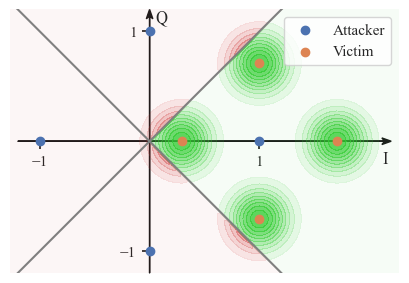

In [205]:
victim_constellation_a = qpsk_constellation * 10**(-EaEvdB/20)
offset_victim_a = attacker_constellation[0] + victim_constellation_a

iq_base(-1.2, 2.2, -1.2, 1.2)

noise_x = np.arange(-3, 3, 0.02)
noise_y = np.arange(-3, 3, 0.02)
xx, yy = np.meshgrid(noise_x, noise_y)
noise_sigma = 10**(-EaN0dB/20)/np.sqrt(2)

zzs = np.array([np.exp(-((xx-np.real(pt))**2 + (yy-np.imag(pt))**2)/noise_sigma**2) for pt in offset_victim_a])
zz = np.sum(zzs, axis=0)
zzr = np.max(zz)*1.2
zz *= np.where(xx > np.abs(yy), 1, -1)
plt.contourf(xx, yy, zz, cmap = newcmp, vmin=-zzr, vmax=zzr, levels=16)
#plt.colorbar()


#zzs = np.array([np.exp(-((xx-np.real(pt))**2 + (yy-np.imag(pt))**2)/noise_sigma**2) for pt in offset_victim_a])
#zz = np.sum(zzs, axis=0)
#zz *= np.where(-xx > np.abs(yy), 1, -1)
#plt.pcolor(xx, yy, zz, cmap = newcmp, vmin=-1, vmax=1)
#plt.colorbar()

plt.plot([-2, 2], [-2, 2], c="gray")
plt.plot([-2, 2], [2, -2], c="gray")

lines = []

colcycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
lines.append(plt.scatter(np.real(attacker_constellation), np.imag(attacker_constellation), color=colcycle[0]))
lines.append(plt.scatter(np.real(offset_victim_a), np.imag(offset_victim_a), color=colcycle[1]))
#plt.scatter(np.real(offset_victim_a), np.imag(offset_victim_a), color=colcycle[1])

plt.legend(lines, ["Attacker", "Victim"])

plt.xlim(-1.2, 2.2)
plt.ylim(-1.2, 1.2)

plt.tight_layout()
plt.savefig("iq_diagram_aligned.pdf")
plt.show()

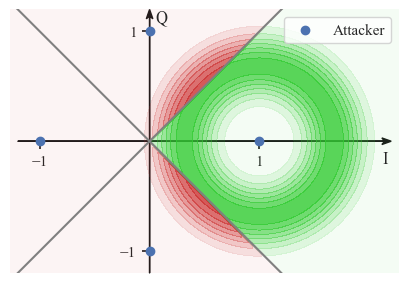

In [206]:
iq_base(-1.2, 2.2, -1.2, 1.2)

noise_x = np.arange(-3, 3, 0.02)
noise_y = np.arange(-3, 3, 0.02)
xx, yy = np.meshgrid(noise_x, noise_y)
noise_sigma = 10**(-EaN0dB/20)/np.sqrt(2)

zzs = np.array([
    np.exp(-((xx-np.real(pt))**2 + (yy-np.imag(pt))**2)/noise_sigma**2) for pt in [
        attacker_constellation[0] + qpsk_constellation[0] * 10**(-EaEvdB/20) * np.exp(1j*ph) for ph in np.linspace(0,2*np.pi, 600)
    ]])
zz = np.sum(zzs, axis=0)
zzr = np.max(zz)*1.2
zz *= np.where(xx > np.abs(yy), 1, -1)
plt.contourf(xx, yy, zz, cmap = newcmp, vmin=-zzr, vmax=zzr, levels=16)
#plt.colorbar()


#zzs = np.array([np.exp(-((xx-np.real(pt))**2 + (yy-np.imag(pt))**2)/noise_sigma**2) for pt in offset_victim_a])
#zz = np.sum(zzs, axis=0)
#zz *= np.where(-xx > np.abs(yy), 1, -1)
#plt.pcolor(xx, yy, zz, cmap = newcmp, vmin=-1, vmax=1)
#plt.colorbar()

lines = []

plt.plot([-2, 2], [-2, 2], c="gray")
plt.plot([-2, 2], [2, -2], c="gray")

colcycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
lines.append(plt.scatter(np.real(attacker_constellation), np.imag(attacker_constellation), color=colcycle[0]))
#plt.scatter(np.real(offset_victim_a), np.imag(offset_victim_a), color=colcycle[1])

plt.legend(lines, ["Attacker"])

plt.xlim(-1.2, 2.2)
plt.ylim(-1.2, 1.2)

plt.tight_layout()
plt.savefig("iq_diagram_unaligned.pdf")
plt.show()


1.1111111111111112
1.0


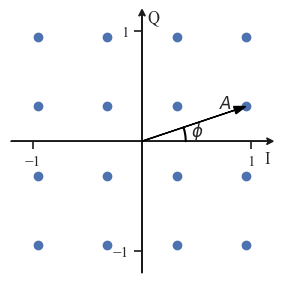

In [207]:
iq_base(-1.2, 1.2, -1.2, 1.2)

ax_16qam = np.linspace(-1, 1, 4, True)
constellation_16qam_i, constellation_16qam_q = np.meshgrid(ax_16qam, ax_16qam)
constellation_16qam = np.array(constellation_16qam_i + 1j*constellation_16qam_q).flatten()

norm = np.average(constellation_16qam.real**2+constellation_16qam.imag**2)
constellation_16qam /= np.sqrt(norm)
print(norm)

norm = np.average(constellation_16qam.real**2+constellation_16qam.imag**2)
print(norm)

plt.scatter(np.real(constellation_16qam), np.imag(constellation_16qam), color=colcycle[0])

plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)

plt.arrow(0, 0, np.real(constellation_16qam[11]), np.imag(constellation_16qam[11]), length_includes_head=True, color='black', head_width=0.07)

plt.plot(0.4*np.cos(np.arange(0, np.arctan(1/3), 0.01)), 0.4*np.sin(np.arange(0, np.arctan(1/3), 0.01)), color="black")
plt.text(0.45, 0.045, "$\\phi$")
plt.text(0.7, 0.3, "$A$")

plt.tight_layout()
plt.savefig("iq_basics.pdf")
plt.show()
